In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df_mushrooms = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [3]:
train_df_mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [7]:
X = train_df_mushrooms.drop('class', axis=1)
y = train_df_mushrooms['class']

In [9]:
parametrs = {'n_estimators' : range(10,50,10),
             'max_depth' : range(1,12,2),
             'min_samples_leaf' : range(1,7),
             'min_samples_split' : range(2,9,2)}

In [10]:
rf = RandomForestClassifier(random_state=0)

In [11]:
search = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1)

In [12]:
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [14]:
best_clf = search.best_estimator_

In [13]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:
features_imp_mushroom = pd.DataFrame({'features' : X.columns,
                                      'features_importances' : best_clf.feature_importances_})

In [19]:
features_imp_mushroom.sort_values('features_importances', ascending=False)

,features,features_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


## Посчитаем количество несъедобных грибов:

In [38]:
test_df_mushroom = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [39]:
test_df_mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [62]:
y_pred = best_clf.predict(test_df_mushroom)

In [63]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [64]:
y_true = pd.read_csv('DataSets/testing_y_mush.csv')

<AxesSubplot:>

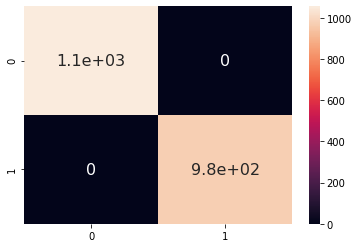

In [75]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, annot_kws={"size": 16})

In [82]:
precision_score(y_true, y_pred)

1.0

In [83]:
recall_score(y_true, y_pred)

1.0

In [84]:
accuracy_score(y_true, y_pred)

1.0